# Notebook to recreate reflectance diagram created in Nakajima and King

> Using the cloud_atm.csv file
- single layer of cloud with Rayleigh scattering

## Constant Effective Radius; varying dTau

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
df = pd.read_csv("../create_atm/atmospheres/cloud_atm.csv", header = None, index_col = 0)

In [37]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0.25,0.028212,0.014515,0.015801,0.014595,0.013082,0.012733,0.024992,0.006230,0.002692,0.003116,0.001897,0.001273
0.50,0.046585,0.018691,0.021410,0.018822,0.015481,0.014784,0.046516,0.015450,0.006433,0.006963,0.004326,0.002973
1.00,0.080804,0.028815,0.034447,0.028892,0.021465,0.020078,0.077481,0.037160,0.016761,0.016723,0.010802,0.007795
2.00,0.132266,0.052225,0.062483,0.051842,0.036603,0.033964,0.106944,0.077158,0.042323,0.040155,0.027461,0.020854
4.00,0.190049,0.094808,0.109889,0.094429,0.069448,0.065109,0.120167,0.128271,0.087946,0.083969,0.061510,0.048507
8.00,0.239587,0.150441,0.167344,0.150767,0.120674,0.115109,0.121829,0.172889,0.143915,0.140247,0.107205,0.085494
16.00,0.273515,0.206248,0.219676,0.204939,0.177599,0.172074,0.121852,0.196478,0.194736,0.191968,0.144580,0.113057
32.00,0.291948,0.249910,0.256777,0.245017,0.225830,0.221521,0.121851,0.201489,0.225991,0.224496,0.160581,0.122254


In [38]:
len(df)

8

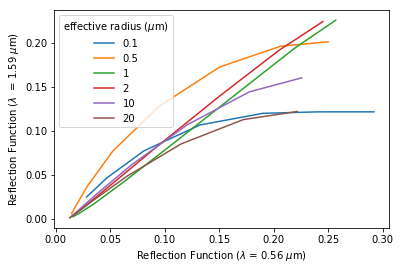

In [39]:
N_cloud = int(df.shape[1]/2)

for i in range(N_cloud):
    plt.plot(df[1+i], df[7+i])

plt.legend(['0.1','0.5','1','2','10','20'], title='effective radius ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show()

## Constant dTau; varying effective radius

In [40]:
import copy

In [41]:
df2 = df.T

In [42]:
df2

,0.25,0.5,1.0,2.0,4.0,8.0,16.0,32.0
1,0.028212,0.046585,0.080804,0.132266,0.190049,0.239587,0.273515,0.291948
2,0.014515,0.018691,0.028815,0.052225,0.094808,0.150441,0.206248,0.249910
3,0.015801,0.021410,0.034447,0.062483,0.109889,0.167344,0.219676,0.256777
4,0.014595,0.018822,0.028892,0.051842,0.094429,0.150767,0.204939,0.245017
5,0.013082,0.015481,0.021465,0.036603,0.069448,0.120674,0.177599,0.225830
6,0.012733,0.014784,0.020078,0.033964,0.065109,0.115109,0.172074,0.221521
7,0.024992,0.046516,0.077481,0.106944,0.120167,0.121829,0.121852,0.121851
8,0.006230,0.015450,0.037160,0.077158,0.128271,0.172889,0.196478,0.201489
9,0.002692,0.006433,0.016761,0.042323,0.087946,0.143915,0.194736,0.225991
10,0.003116,0.006963,0.016723,0.040155,0.083969,0.140247,0.191968,0.224496


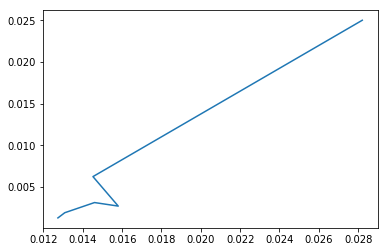

In [43]:
plt.plot(df2[0.25][0:6], df2[0.25][6:12])

In [44]:
dTau_range_cloud = []

for col in df2.columns:
    dTau_range_cloud.append(col)

In [45]:
dTau_range_cloud

[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]

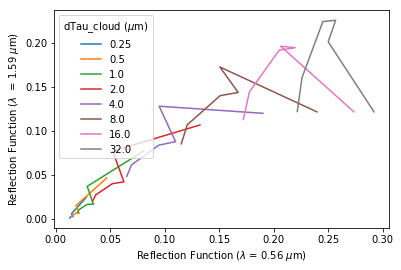

In [46]:
N_dTau_cloud = len(dTau_range_cloud)

fig, ax = plt.subplots()

for i in range(N_dTau_cloud):
    x = df2[dTau_range_cloud[i]][0:6]
    y = df2[dTau_range_cloud[i]][6:12]
    
    plt.plot(x,y)
    #ax.annotate(dTau_range_cloud, (x[i], y[i]))
    
plt.legend(dTau_range_cloud, title='dTau_cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')

plt.show()

> single plot only 

In [47]:
x = []
y = []

for i in range(N_cloud):
    x.append(df2[0.25][i+1])
    y.append(df2[0.25][i+7])
    
n = ['0.1','0.5','1','2','10','20']

<function matplotlib.pyplot.show>

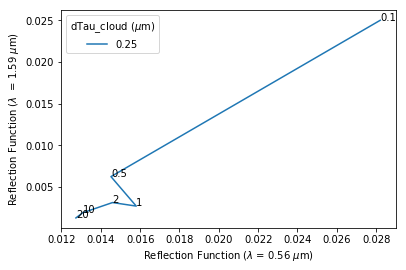

In [48]:
fig, ax = plt.subplots()
ax.plot(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
plt.legend(dTau_range_cloud, title='dTau_cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show

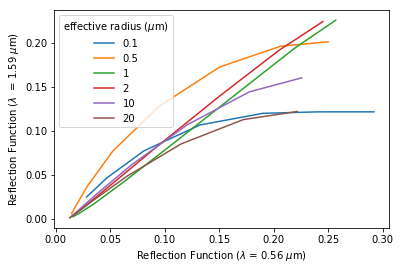

In [49]:
N_cloud = int(df.shape[1]/2)

for i in range(N_cloud):
    plt.plot(df[1+i], df[7+i])

plt.legend(['0.1','0.5','1','2','10','20'], title='effective radius ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show()

## Cloud 2

In [50]:
df2 = pd.read_csv("../create_atm/atmospheres/cloud_atm2.csv", header = None, index_col = 0)

In [51]:
df2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
0.062500,0.041771,0.040453,0.042012,0.043951,0.043508,0.043054,0.042999,0.043109,0.043256,0.043105,0.035956,0.032471,0.032351,0.032421,0.034617,0.035650,0.035615,0.034854,0.034614,0.034504
0.088388,0.042501,0.040611,0.042776,0.045479,0.044863,0.044235,0.044150,0.044305,0.044514,0.044302,0.037612,0.032691,0.032515,0.032617,0.035678,0.037104,0.037058,0.036003,0.035669,0.035515
0.125000,0.043567,0.040830,0.043831,0.047578,0.046719,0.045856,0.045734,0.045952,0.046242,0.045954,0.039931,0.032992,0.032736,0.032892,0.037125,0.039088,0.039026,0.037575,0.037114,0.036903
0.176777,0.045133,0.041142,0.045282,0.050416,0.049234,0.048052,0.047891,0.048193,0.048594,0.048202,0.043173,0.033442,0.033051,0.033293,0.039098,0.041745,0.041668,0.039691,0.039063,0.038777
0.250000,0.047491,0.041603,0.047234,0.054205,0.052588,0.050983,0.050773,0.051194,0.051745,0.051218,0.047645,0.034099,0.033485,0.033867,0.041729,0.045249,0.045152,0.042510,0.041660,0.041270
0.353553,0.051052,0.042279,0.049847,0.059150,0.056948,0.054812,0.054539,0.055128,0.055866,0.055174,0.053715,0.035115,0.034097,0.034700,0.045192,0.049749,0.049634,0.046154,0.045026,0.044504
0.500000,0.056484,0.043287,0.053307,0.065416,0.062460,0.059673,0.059322,0.060113,0.061102,0.060221,0.061754,0.036733,0.034958,0.035923,0.049631,0.055323,0.055201,0.050728,0.049268,0.048576
0.707107,0.064734,0.044819,0.057839,0.073113,0.069188,0.065619,0.065181,0.066233,0.067506,0.066403,0.072002,0.039469,0.036226,0.037754,0.055234,0.061957,0.061822,0.056242,0.054389,0.053486
1.000000,0.077088,0.047165,0.063792,0.082255,0.077074,0.072602,0.072076,0.073387,0.074994,0.073676,0.084292,0.044212,0.038201,0.040531,0.062151,0.069516,0.069339,0.062601,0.060299,0.059116


In [52]:
len(df)

8

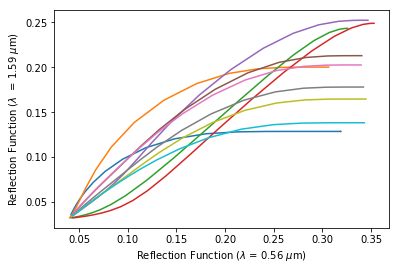

In [67]:
N_cloud2 = int(df2.shape[1]/2)
effr_cloud2 = ['0.1','0.5','1','2','4','8','10','16','20','32']

for i in range(N_cloud2): # N_cloud
    plt.plot(df2[1+i], df2[1+i+N_cloud2])

#plt.legend(effr_cloud, title='effective radius ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show()

In [54]:
df2_T = df2.T

In [55]:
df2_T

,0.0625,0.0883883476483,0.125,0.176776695297,0.25,0.353553390593,0.5,0.707106781187,1.0,1.41421356237,...,11.313708499,16.0,22.627416998,32.0,45.2548339959,64.0,90.5096679919,128.0,181.019335984,256.0
1,0.041771,0.042501,0.043567,0.045133,0.047491,0.051052,0.056484,0.064734,0.077088,0.094852,...,0.265697,0.284804,0.298980,0.308698,0.314630,0.317635,0.318762,0.319032,0.319064,0.319064
2,0.040453,0.040611,0.040830,0.041142,0.041603,0.042279,0.043287,0.044819,0.047165,0.050914,...,0.170972,0.204219,0.234207,0.259295,0.278692,0.292284,0.300558,0.304632,0.306058,0.306371
3,0.042012,0.042776,0.043831,0.045282,0.047234,0.049847,0.053307,0.057839,0.063792,0.071760,...,0.213119,0.244021,0.270428,0.291420,0.306801,0.316919,0.322568,0.325007,0.325718,0.325832
4,0.043951,0.045479,0.047578,0.050416,0.054205,0.059150,0.065416,0.073113,0.082255,0.092850,...,0.228198,0.260423,0.288873,0.312106,0.329609,0.341505,0.348460,0.351685,0.352723,0.352912
5,0.043508,0.044863,0.046719,0.049234,0.052588,0.056948,0.062460,0.069188,0.077074,0.086031,...,0.205821,0.239149,0.269934,0.296058,0.316509,0.331046,0.340060,0.344637,0.346311,0.346690
6,0.043054,0.044235,0.045856,0.048052,0.050983,0.054812,0.059673,0.065619,0.072602,0.080516,...,0.189911,0.223437,0.255355,0.283124,0.305386,0.321626,0.332061,0.337594,0.339778,0.340329
7,0.042999,0.044150,0.045734,0.047891,0.050773,0.054539,0.059322,0.065181,0.072076,0.079878,...,0.187023,0.220535,0.252689,0.280832,0.303523,0.320180,0.330966,0.336757,0.339075,0.339664
8,0.043109,0.044305,0.045952,0.048193,0.051194,0.055128,0.060113,0.066233,0.073387,0.081433,...,0.185723,0.219184,0.251689,0.280430,0.303818,0.321179,0.332557,0.338777,0.341345,0.342026
9,0.043256,0.044514,0.046242,0.048594,0.051745,0.055866,0.061102,0.067506,0.074994,0.083355,...,0.187027,0.220456,0.253081,0.282031,0.305679,0.323295,0.334900,0.341282,0.343934,0.344669
10,0.043105,0.044302,0.045954,0.048202,0.051218,0.055174,0.060221,0.066403,0.073676,0.081817,...,0.183304,0.216658,0.249448,0.278727,0.302795,0.320810,0.332782,0.339420,0.342227,0.343008


In [62]:
dTau_range_cloud2 = []

for col in df2_T.columns:
    dTau_range_cloud2.append(col)
    
N_dTau_cloud2 = len(dTau_range_cloud2)

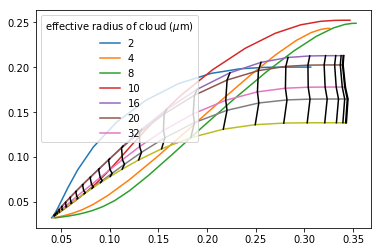

In [71]:
fig, ax = plt.subplots()

for i in range(1,10):
    plt.plot(df2[i+1], df2[N_cloud2+i+1])
# plt.plot(df_cloud[5], df_cloud[11])
# plt.plot(df_cloud[6], df_cloud[12])

plt.legend(effr_cloud2[3:10], title='effective radius of cloud ($\mu$m)')
# plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')

for i in range(N_dTau_cloud2):
    x = df2_T[dTau_range_cloud2[i]][5:10]
    y = df2_T[dTau_range_cloud2[i]][15:20]
    
    plt.plot(x,y, color = 'k')

In [72]:
df2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
0.062500,0.041771,0.040453,0.042012,0.043951,0.043508,0.043054,0.042999,0.043109,0.043256,0.043105,0.035956,0.032471,0.032351,0.032421,0.034617,0.035650,0.035615,0.034854,0.034614,0.034504
0.088388,0.042501,0.040611,0.042776,0.045479,0.044863,0.044235,0.044150,0.044305,0.044514,0.044302,0.037612,0.032691,0.032515,0.032617,0.035678,0.037104,0.037058,0.036003,0.035669,0.035515
0.125000,0.043567,0.040830,0.043831,0.047578,0.046719,0.045856,0.045734,0.045952,0.046242,0.045954,0.039931,0.032992,0.032736,0.032892,0.037125,0.039088,0.039026,0.037575,0.037114,0.036903
0.176777,0.045133,0.041142,0.045282,0.050416,0.049234,0.048052,0.047891,0.048193,0.048594,0.048202,0.043173,0.033442,0.033051,0.033293,0.039098,0.041745,0.041668,0.039691,0.039063,0.038777
0.250000,0.047491,0.041603,0.047234,0.054205,0.052588,0.050983,0.050773,0.051194,0.051745,0.051218,0.047645,0.034099,0.033485,0.033867,0.041729,0.045249,0.045152,0.042510,0.041660,0.041270
0.353553,0.051052,0.042279,0.049847,0.059150,0.056948,0.054812,0.054539,0.055128,0.055866,0.055174,0.053715,0.035115,0.034097,0.034700,0.045192,0.049749,0.049634,0.046154,0.045026,0.044504
0.500000,0.056484,0.043287,0.053307,0.065416,0.062460,0.059673,0.059322,0.060113,0.061102,0.060221,0.061754,0.036733,0.034958,0.035923,0.049631,0.055323,0.055201,0.050728,0.049268,0.048576
0.707107,0.064734,0.044819,0.057839,0.073113,0.069188,0.065619,0.065181,0.066233,0.067506,0.066403,0.072002,0.039469,0.036226,0.037754,0.055234,0.061957,0.061822,0.056242,0.054389,0.053486
1.000000,0.077088,0.047165,0.063792,0.082255,0.077074,0.072602,0.072076,0.073387,0.074994,0.073676,0.084292,0.044212,0.038201,0.040531,0.062151,0.069516,0.069339,0.062601,0.060299,0.059116


In [73]:
df2_T

,0.0625,0.0883883476483,0.125,0.176776695297,0.25,0.353553390593,0.5,0.707106781187,1.0,1.41421356237,...,11.313708499,16.0,22.627416998,32.0,45.2548339959,64.0,90.5096679919,128.0,181.019335984,256.0
1,0.041771,0.042501,0.043567,0.045133,0.047491,0.051052,0.056484,0.064734,0.077088,0.094852,...,0.265697,0.284804,0.298980,0.308698,0.314630,0.317635,0.318762,0.319032,0.319064,0.319064
2,0.040453,0.040611,0.040830,0.041142,0.041603,0.042279,0.043287,0.044819,0.047165,0.050914,...,0.170972,0.204219,0.234207,0.259295,0.278692,0.292284,0.300558,0.304632,0.306058,0.306371
3,0.042012,0.042776,0.043831,0.045282,0.047234,0.049847,0.053307,0.057839,0.063792,0.071760,...,0.213119,0.244021,0.270428,0.291420,0.306801,0.316919,0.322568,0.325007,0.325718,0.325832
4,0.043951,0.045479,0.047578,0.050416,0.054205,0.059150,0.065416,0.073113,0.082255,0.092850,...,0.228198,0.260423,0.288873,0.312106,0.329609,0.341505,0.348460,0.351685,0.352723,0.352912
5,0.043508,0.044863,0.046719,0.049234,0.052588,0.056948,0.062460,0.069188,0.077074,0.086031,...,0.205821,0.239149,0.269934,0.296058,0.316509,0.331046,0.340060,0.344637,0.346311,0.346690
6,0.043054,0.044235,0.045856,0.048052,0.050983,0.054812,0.059673,0.065619,0.072602,0.080516,...,0.189911,0.223437,0.255355,0.283124,0.305386,0.321626,0.332061,0.337594,0.339778,0.340329
7,0.042999,0.044150,0.045734,0.047891,0.050773,0.054539,0.059322,0.065181,0.072076,0.079878,...,0.187023,0.220535,0.252689,0.280832,0.303523,0.320180,0.330966,0.336757,0.339075,0.339664
8,0.043109,0.044305,0.045952,0.048193,0.051194,0.055128,0.060113,0.066233,0.073387,0.081433,...,0.185723,0.219184,0.251689,0.280430,0.303818,0.321179,0.332557,0.338777,0.341345,0.342026
9,0.043256,0.044514,0.046242,0.048594,0.051745,0.055866,0.061102,0.067506,0.074994,0.083355,...,0.187027,0.220456,0.253081,0.282031,0.305679,0.323295,0.334900,0.341282,0.343934,0.344669
10,0.043105,0.044302,0.045954,0.048202,0.051218,0.055174,0.060221,0.066403,0.073676,0.081817,...,0.183304,0.216658,0.249448,0.278727,0.302795,0.320810,0.332782,0.339420,0.342227,0.343008
